<a href="https://colab.research.google.com/github/Martinexe4/Predictive-Analysis-Student-Mental-Health/blob/main/Student_Mental_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pertanyaaan


1. Bagaimana Distribusi tingkat depresi, anxiety, dan stress berdasarkan Gender?
2. Bagaimana performa tingkat depresi, anxiety, dan stress berdasarkan Usia, Tingkat Semester, dan Current GPA?
3. Bagaimana distribusi Suicidal Thoughts berdasarkan Gender, Department, Tingkat Semester, dan Umur?



# Impor Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

# Data Gathering

In [ ]:
df = pd.read_csv('/content/Raw Data.csv')

# Data Understanding


In [ ]:
df

,1. Age,2. Gender,3. University,4. Department,5. Academic Year,6. Current CGPA,7. Did you receive a waiver or scholarship at your university?,"1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure?","2. In a semester, how often have you been unable to stop worrying about your academic affairs?","3. In a semester, how often have you had trouble relaxing due to academic pressure?",...,"2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?","7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?","8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?","9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


In [ ]:
df.shape

(1977, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                                                                                                                                                                 Non-Null Count  Dtype 
---  ------                                                                                                                                                                 --------------  ----- 
 0   1. Age                                                                                                                                                                 1977 non-null   object
 1   2. Gender                                                                                                                                                              1977 non-null   object
 2   3. University                                                                                               

In [ ]:
df.columns

Index(['1. Age', '2. Gender', '3. University', '4. Department',
       '5. Academic Year', '6. Current CGPA',
       '7. Did you receive a waiver or scholarship at your university?',
       '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ',
       '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ',
       '3. In a semester, how often have you had trouble relaxing due to academic pressure? ',
       '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?',
       '5. In a semester, how often have you worried too much about academic affairs? ',
       '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?',
       '7. In a semester, how often have you felt afraid, as if something awful might happen?',
       'Anxiety Value', 'Anxiety Label',
       '1. In a semester, how often have you felt upset due

## Mapping Data

In [ ]:
column_mapping = {
    "1. Age":"Age",
    "2. Gender":"Gender",
    "3. University":"University",
    "4. Department":"Department",
    "5. Academic Year":"Academic Year",
    "6. Current CGPA":"Current CGPA",
    '7. Did you receive a waiver or scholarship at your university?': 'Waiver/Scholarship',
    '1. In a semester, how often you felt nervous, anxious or on edge due to academic pressure? ': 'Nervous/Anxious',
    '2. In a semester, how often have you been unable to stop worrying about your academic affairs? ': 'Worrying',
    '3. In a semester, how often have you had trouble relaxing due to academic pressure? ': 'Trouble Relaxing ',
    '4. In a semester, how often have you been easily annoyed or irritated because of academic pressure?': 'Easily Annoyed',
    '5. In a semester, how often have you worried too much about academic affairs? ': 'Excessive Worry ',
    '6. In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?': 'Restless',
    '7. In a semester, how often have you felt afraid, as if something awful might happen?': 'Fearful ',
    'Anxiety Value': 'Anxiety Value',
    'Anxiety Label': 'Anxiety Label',
    '1. In a semester, how often have you felt upset due to something that happened in your academic affairs? ': 'Upset',
    '2. In a semester, how often you felt as if you were unable to control important things in your academic affairs?': 'Lack of Control',
    '3. In a semester, how often you felt nervous and stressed because of academic pressure? ': 'Nervous/Stress ',
    '4. In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) ': 'Inadequate Coping',
    '5. In a semester, how often you felt confident about your ability to handle your academic / university problems?': 'Confident',
    '6. In a semester, how often you felt as if things in your academic life is going on your way? ': 'Things Going Well',
    '7. In a semester, how often are you able to control irritations in your academic / university affairs? ': 'Control Irritations',
    '8. In a semester, how often you felt as if your academic performance was on top?': 'Top Performance',
    '9. In a semester, how often you got angered due to bad performance or low grades that is beyond your control? ': 'Angered by Performance',
    '10. In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them? ': 'Overwhelmed',
    'Stress Value': 'Stress Value',
    'Stress Label': 'Stress Label',
    '1. In a semester, how often have you had little interest or pleasure in doing things?': 'Lack of Interest',
    '2. In a semester, how often have you been feeling down, depressed or hopeless?': 'Feeling Down',
    '3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much? ': 'Sleep Issues',
    '4. In a semester, how often have you been feeling tired or having little energy? ': 'Fatigue',
    '5. In a semester, how often have you had poor appetite or overeating? ': 'Appetite Issues',
    '6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down? ': 'Self-Doubt',
    '7. In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television? ': 'Concentration Issues',
    '8. In a semester, how often have you moved or spoke too slowly for other people to notice? Or you\'ve been moving a lot more than usual because you\'ve been restless? ': 'Movement Issues',
    '9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ': 'Suicidal Thoughts',
    "Depression Value":"Depression Value",
    "Depression Label":"Depression Label"
}

df.rename(columns=column_mapping, inplace=True)

df.columns

Index(['Age', 'Gender', 'University', 'Department', 'Academic Year',
       'Current CGPA', 'Waiver/Scholarship', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Anxiety Label', 'Upset',
       'Lack of Control', 'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value', 'Stress Label',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value',
       'Depression Label'],
      dtype='object')

In [ ]:
df.head(2)

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1977 non-null   object
 1   Gender                  1977 non-null   object
 2   University              1977 non-null   object
 3   Department              1977 non-null   object
 4   Academic Year           1977 non-null   object
 5   Current CGPA            1977 non-null   object
 6   Waiver/Scholarship      1977 non-null   object
 7   Nervous/Anxious         1977 non-null   int64 
 8   Worrying                1977 non-null   int64 
 9   Trouble Relaxing        1977 non-null   int64 
 10  Easily Annoyed          1977 non-null   int64 
 11  Excessive Worry         1977 non-null   int64 
 12  Restless                1977 non-null   int64 
 13  Fearful                 1977 non-null   int64 
 14  Anxiety Value           1977 non-null   int64 
 15  Anxi

## Melihat Unik Value

In [ ]:
for i in df.columns:
  print(f'{i}\n')
  print(f"Unique Values =  \n {df[i].unique()} \n ", "\n")
  print(f"Unique Value Count=  \n {df[i].value_counts()} \n ", "-"*100 , "\n")

Age

Unique Values =  
 ['18-22' '23-26' 'Below 18' '27-30' 'Above 30'] 
  

Unique Value Count=  
 Age
18-22       1273
23-26        673
27-30         24
Below 18       4
Above 30       3
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

Gender

Unique Values =  
 ['Female' 'Male' 'Prefer not to say'] 
  

Unique Value Count=  
 Gender
Male                 1372
Female                595
Prefer not to say      10
Name: count, dtype: int64 
  ---------------------------------------------------------------------------------------------------- 

University

Unique Values =  
 ['Independent University, Bangladesh (IUB)' 'Daffodil University'
 'Bangladesh University of Engineering and Technology (BUET)'
 'BRAC University' 'Dhaka University (DU)' 'North South University (NSU)'
 'American International University Bangladesh (AIUB)'
 'Dhaka University of Engineering and Technology (DUET)'
 'Rajshahi University (R

# Data Cleaning

## Drop columns yang tidak relevan

In [ ]:
drop_condition = (
    (df['Department'] == 'Engineering - Other')
)

print(f'Jumlah keseluruhan records: {len(df)}')
print(f"Jumlah records yang akan di drop: {len(drop_condition)}")
df = df[~drop_condition]
print(f"Jumlah records yang terhapus: {len(df) - len(drop_condition)}")


Jumlah keseluruhan records: 1977
Jumlah records yang akan di drop: 1977
Jumlah records yang terhapus: -4


In [ ]:
df

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,18-22,Female,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,Fourth Year or Equivalent,2.50 - 2.99,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.80 - 4.00,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.00 - 3.39,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,18-22,Male,"Independent University, Bangladesh (IUB)",Engineering - CS / CSE / CSC / Similar to CS,First Year or Equivalent,3.40 - 3.79,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,23-26,Male,Bangladesh Agricultural University (BAU),Biological Sciences,Fourth Year or Equivalent,3.40 - 3.79,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,23-26,Female,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.40 - 3.79,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,23-26,Female,Bangladesh Agricultural University (BAU),Biological Sciences,Other,3.80 - 4.00,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,23-26,Male,Bangladesh Agricultural University (BAU),Other,Fourth Year or Equivalent,3.00 - 3.39,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


In [ ]:
department_mapping = {
    'Engineering - CS / CSE / CSC / Similar to CS' : 'Teknik Informatika',
    'Other' : 'Other',
    'Engineering - EEE/ ECE / Similar to EEE' : 'Teknik Elektro',
    'Environmental and Life Sciences' : 'Teknik Lingkungan',
    'Business and Entrepreneurship Studies' : 'Bisnis',
    'Pharmacy and Public Health' : 'Farmasi dan Kesehatan Publik',
    'Biological Sciences' : 'Biologi',
    'Engineering - Civil Engineering / Similar to CE' : 'Teknik Sipil',
    'Engineering - Mechanical Engineering / Similar to ME' : 'Teknik Kimia',
    'Law and Human Rights' : 'Hukum',
    'Liberal Arts and Social Sciences' : 'Sosiologi'
}

Academic_year_mapping ={
    'Fourth Year or Equivalent': 4,
    'First Year or Equivalent': 1,
    'Third Year or Equivalent': 3,
    'Second Year or Equivalent': 2,
    'Other': -1            #placeholder for others
}

age_mapping = {
    '18-22': 20,
    '23-26': 25,
    '27-30': 28,
    'Below 18' : 17,
    'Above 30' : 30
}

cgpa_mapping = {
    'Below 2.50': 2.0,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.39': 3.20,
    '3.40 - 3.79': 3.60,
    '3.80 - 4.00': 3.90,
    'Other': -1             #placeholder for others
}

df['Department'] = df['Department'].map(department_mapping)
df['Academic Year'] = df['Academic Year'].map(Academic_year_mapping)
df['Age'] = df['Age'].map(age_mapping)
df['Current CGPA'] = df['Current CGPA'].map(cgpa_mapping)

<ipython-input-13-478ca2adbfe7>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Department'] = df['Department'].map(department_mapping)
<ipython-input-13-478ca2adbfe7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Academic Year'] = df['Academic Year'].map(Academic_year_mapping)
<ipython-input-13-478ca2adbfe7>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [ ]:
df.head(2)

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,20,Female,"Independent University, Bangladesh (IUB)",Teknik Informatika,4,2.75,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,20,Male,"Independent University, Bangladesh (IUB)",Teknik Informatika,1,3.90,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression


In [ ]:
df.dtypes

,0
Age,int64
Gender,object
University,object
Department,object
Academic Year,int64
Current CGPA,float64
Waiver/Scholarship,object
Nervous/Anxious,int64
Worrying,int64
Trouble Relaxing,int64


## Hapus Data Duplikat


In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates()

,Age,Gender,University,Department,Academic Year,Current CGPA,Waiver/Scholarship,Nervous/Anxious,Worrying,Trouble Relaxing,...,Feeling Down,Sleep Issues,Fatigue,Appetite Issues,Self-Doubt,Concentration Issues,Movement Issues,Suicidal Thoughts,Depression Value,Depression Label
0,20,Female,"Independent University, Bangladesh (IUB)",Teknik Informatika,4,2.75,No,1,1,1,...,2,1,1,2,1,1,1,1,11,Moderate Depression
1,20,Male,"Independent University, Bangladesh (IUB)",Teknik Informatika,1,3.90,No,2,2,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
2,20,Male,"Independent University, Bangladesh (IUB)",Teknik Informatika,1,3.20,No,2,1,1,...,0,2,3,2,2,2,2,1,16,Moderately Severe Depression
3,20,Male,"Independent University, Bangladesh (IUB)",Teknik Informatika,1,3.60,No,2,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
4,20,Male,"Independent University, Bangladesh (IUB)",Teknik Informatika,1,3.60,No,1,1,1,...,1,1,1,1,1,1,1,1,9,Mild Depression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,25,Male,Bangladesh Agricultural University (BAU),Biologi,4,3.60,No,1,2,2,...,2,1,2,2,1,1,1,1,13,Moderate Depression
1973,25,Female,Bangladesh Agricultural University (BAU),Other,4,3.60,No,2,2,2,...,2,1,2,1,0,1,1,0,9,Mild Depression
1974,25,Female,Bangladesh Agricultural University (BAU),Biologi,-1,3.90,No,1,0,1,...,3,3,3,3,3,3,1,0,22,Severe Depression
1975,25,Male,Bangladesh Agricultural University (BAU),Other,4,3.20,No,1,1,1,...,1,1,2,2,1,2,2,0,11,Moderate Depression


# Mengecek Statistik dari Dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1973.0,21.809427,2.488548,17.0,20.00,20.0,25.0,30.0
Academic Year,1973.0,2.268626,1.275377,-1.0,1.00,2.0,3.0,4.0
Current CGPA,1973.0,2.905423,1.271341,-1.0,2.75,3.2,3.6,3.9
Nervous/Anxious,1973.0,1.769894,0.951014,0.0,1.00,2.0,3.0,3.0
Worrying,1973.0,1.628991,1.028109,0.0,1.00,2.0,3.0,3.0
Trouble Relaxing,1973.0,1.747086,0.996138,0.0,1.00,2.0,3.0,3.0
Easily Annoyed,1973.0,1.777496,0.965774,0.0,1.00,2.0,3.0,3.0
Excessive Worry,1973.0,1.859098,0.981789,0.0,1.00,2.0,3.0,3.0
Restless,1973.0,1.787633,0.992880,0.0,1.00,2.0,3.0,3.0
Fearful,1973.0,1.719716,1.057669,0.0,1.00,2.0,3.0,3.0


# Numerical dan Categorical Kolom

In [ ]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Age', 'Academic Year', 'Current CGPA', 'Nervous/Anxious', 'Worrying',
       'Trouble Relaxing ', 'Easily Annoyed', 'Excessive Worry ', 'Restless',
       'Fearful ', 'Anxiety Value', 'Upset', 'Lack of Control',
       'Nervous/Stress ', 'Inadequate Coping', 'Confident',
       'Things Going Well', 'Control Irritations', 'Top Performance',
       'Angered by Performance', 'Overwhelmed', 'Stress Value',
       'Lack of Interest', 'Feeling Down', 'Sleep Issues', 'Fatigue',
       'Appetite Issues', 'Self-Doubt', 'Concentration Issues',
       'Movement Issues', 'Suicidal Thoughts', 'Depression Value'],
      dtype='object')

Categorical Columns:
Index(['Gender', 'University', 'Department', 'Waiver/Scholarship',
       'Anxiety Label', 'Stress Label', 'Depression Label'],
      dtype='object')


# Visualisasi Data

## Demografik Gender, Department, Academic Year, dan Scholarship

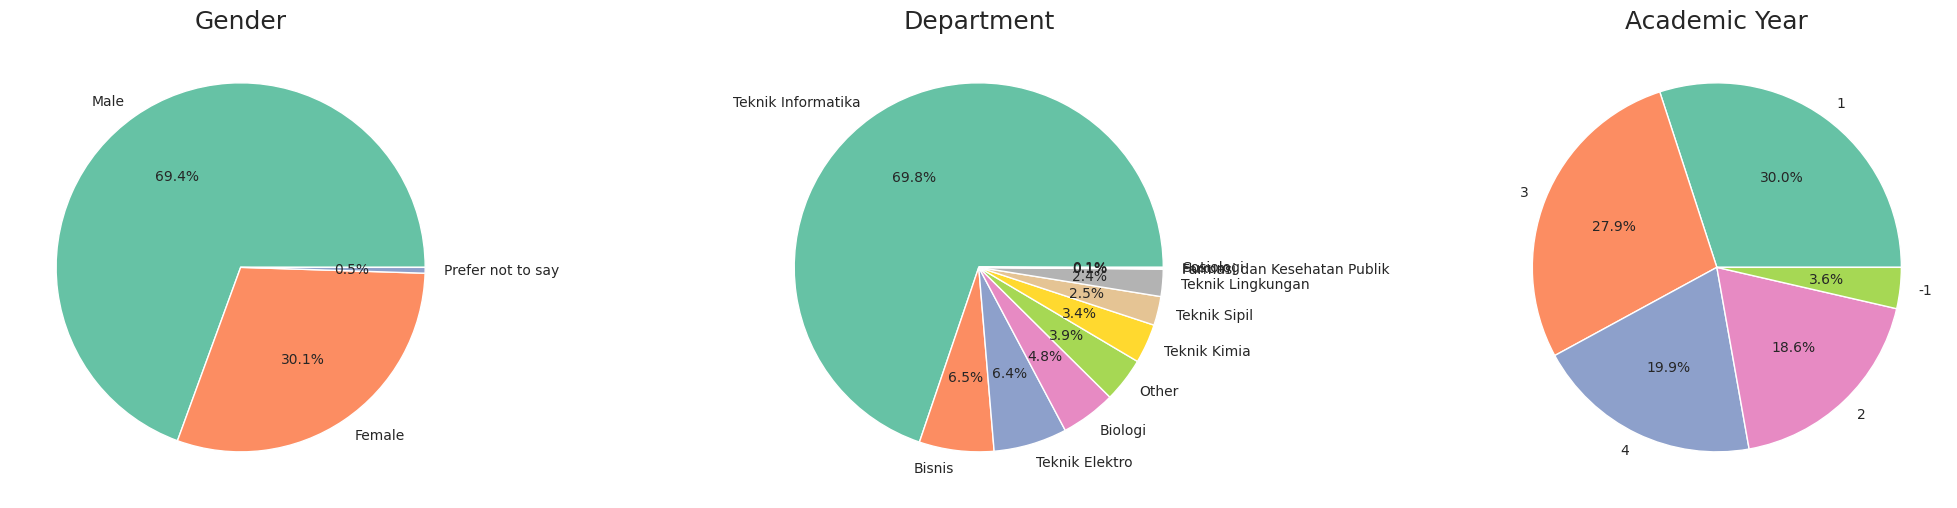

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan kolom yang ingin divisualisasikan dan judulnya
columns = ["Gender", "Department", "Academic Year"]
titles = ["Gender", "Department", "Academic Year"]

# Atur palet dan gaya
palette = sns.color_palette("Set2")
sns.set_style("darkgrid")

# Atur ukuran figure
plt.figure(figsize=(25, 15))

# Loop melalui kolom dan subplot
for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)  # subplot 1 baris dan jumlah kolom sesuai
    plt.pie(df[col].value_counts(),
            labels=df[col].value_counts().index,
            autopct='%1.1f%%',
            colors=palette)
    plt.title(titles[i - 1], fontsize=18)

# Atur jarak antar subplot
plt.subplots_adjust(wspace=0.6, hspace=0.5)

# Tampilkan plot
plt.show()


### Penjelasan
Dari visualisasi diatas dapat disimpulkan:
1. Dominasi gender laki-laki sebesar 69.4 persen, perempuan 30.1% dan prefer not to say sebesar 0.5%. Sehingga terdapat ketidak seimbangan jumlah data. Hal ini dapat mempengaruhi hasil akhir dari penarikan kesimpulan berdasasrkan pertanyaan nomor 1
2. Department Teknik Informatika memliki dominasi sebanyak 69.8%.
4. Academcic Year didominasi oleh mahasiswa tahun pertama, sebanyak 30%


## Distribusi depresi, anxiety, dan strees berdaasarkan gender

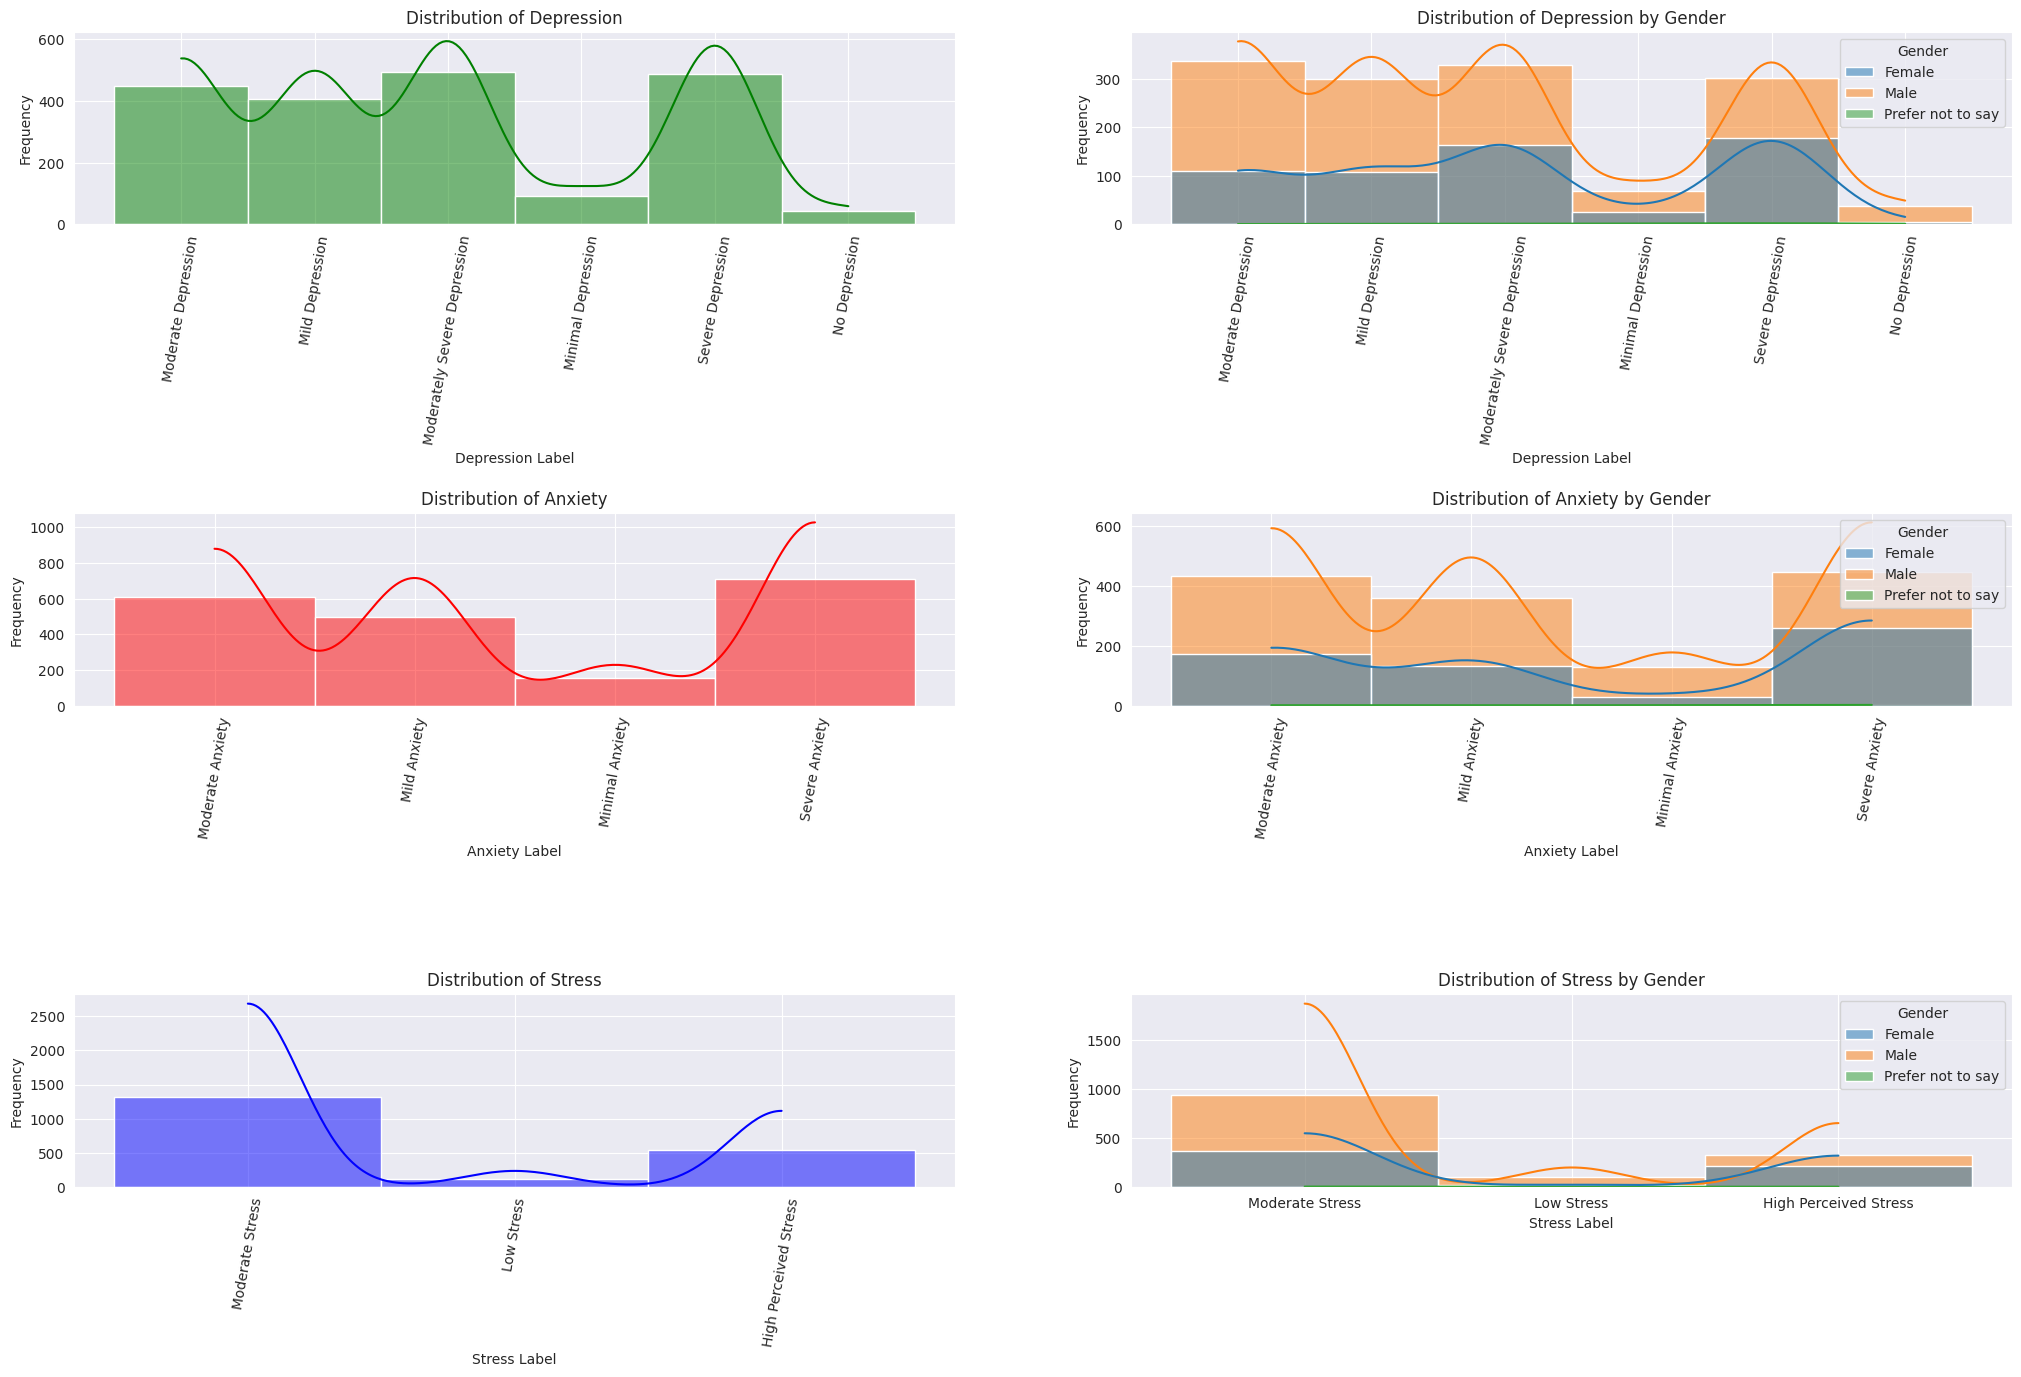

In [ ]:
palette = sns.color_palette("Set2")

plt.figure(figsize=(25, 15))
sns.set_style('darkgrid')

plt.subplot(3, 2, 1)
sns.histplot(data=df, x='Depression Label', color='g', kde=True)
plt.title('Distribution of Depression')
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 2, 2)
sns.histplot(data=df, x='Depression Label', hue='Gender',color='green', kde=True)
plt.title('Distribution of Depression by Gender')
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 2, 3)
sns.histplot(data=df, x='Anxiety Label', color='r', kde=True)
plt.title('Distribution of Anxiety')
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 2, 4)
sns.histplot(data=df, x='Anxiety Label', hue='Gender',color='red', kde=True)
plt.title('Distribution of Anxiety by Gender')
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 2, 5)
sns.histplot(data=df, x='Stress Label', color='b', kde=True)
plt.title('Distribution of Stress')
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 2, 6)
sns.histplot(data=df, x='Stress Label', hue='Gender',color='blue', kde=True)
plt.title('Distribution of Stress by Gender')
plt.ylabel("Frequency")


plt.subplots_adjust(wspace=0.2,hspace=1.5)
plt.show()

### Penjelasan Kesimpulan Pertanyaan 1
1. Depresi : Tingkat Depresi antara laki-laki dan perempuan memiliki tingkt depresi yang serupa, namun proporsi laki-laki lebih signifikan dibanding perempuan
2. Anxiety : Laki-laki melaporkan tingkat kecemasan yang lebih tinggi, dengan persentase lebih besar pada kategori kecemasan sedang dan berat dibandingkan perempuan.
3. Stress : Distribusi tingkat stres relatif seimbang antar gender, dan tidak ada perbedaan signifikan dalam tingkat stres yang dilaporkan.

Ditarik kesimpulan laki-laki memiliki tingkat depresi, anxiety, dan stress lebih tinggi dari peremupuan. Namun Hal ini dipengaruhi oleh jumlah data laki-laki > perempuan


## Distribusi depresi, anxiety, dan strees berdaasarkan Usia,Semester,Current GPA

<ipython-input-22-bb6915e2c9ee>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Depression Label', palette=palette, kde=True)
<ipython-input-22-bb6915e2c9ee>:12: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.histplot(data=df, x='Depression Label', hue='Age',palette=palette, kde=True)
<ipython-input-22-bb6915e2c9ee>:19: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.histplot(data=df, x='Depression Label', hue='Current CGPA',palette=palette, kde=True)
<ipython-input-22-bb6915e2c9ee>:26: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.histplot(data=df, x='Depression Label', hue='Academic Year',palette=palette, kde=True)
<ipython-input-22-bb6915e2c9ee>:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Anxiety Label', p

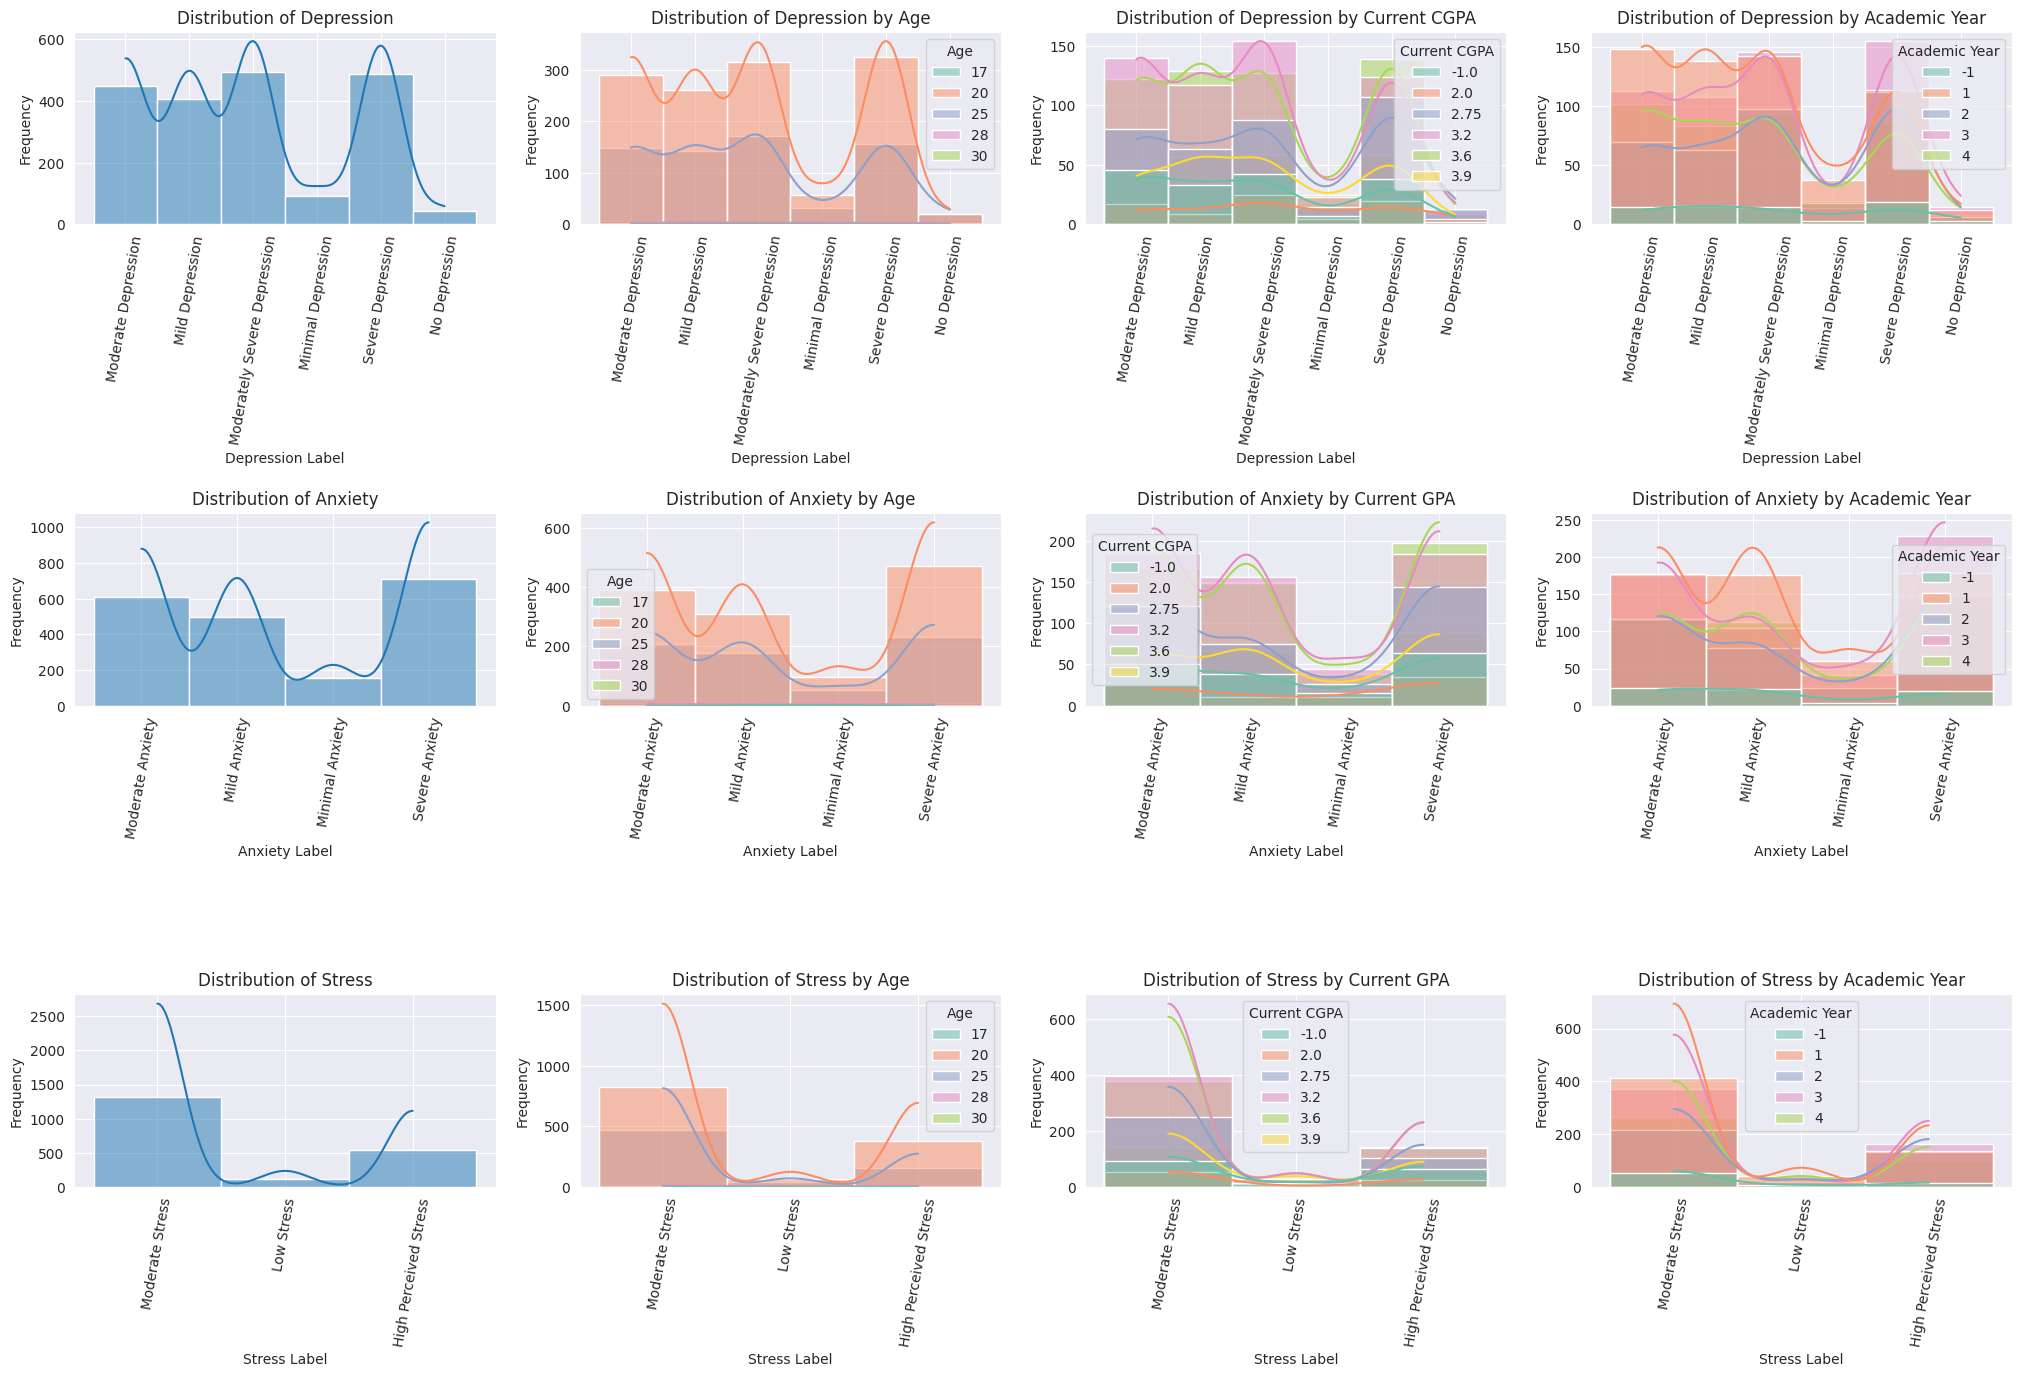

In [ ]:
plt.figure(figsize=(25, 15))
sns.set_style('darkgrid')

plt.subplot(3, 4, 1)
sns.histplot(data=df, x='Depression Label', palette=palette, kde=True)
plt.title('Distribution of Depression')
plt.xlabel("Depression Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 2)
sns.histplot(data=df, x='Depression Label', hue='Age',palette=palette, kde=True)
plt.title('Distribution of Depression by Age')
plt.xlabel("Depression Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 3)
sns.histplot(data=df, x='Depression Label', hue='Current CGPA',palette=palette, kde=True)
plt.title('Distribution of Depression by Current CGPA')
plt.xlabel("Depression Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 4)
sns.histplot(data=df, x='Depression Label', hue='Academic Year',palette=palette, kde=True)
plt.title('Distribution of Depression by Academic Year')
plt.xlabel("Depression Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 5)
sns.histplot(data=df, x='Anxiety Label', palette=palette, kde=True)
plt.title('Distribution of Anxiety')
plt.xlabel('Anxiety Label')
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 6)
sns.histplot(data=df, x='Anxiety Label', hue='Age',palette=palette, kde=True)
plt.title('Distribution of Anxiety by Age')
plt.xlabel("Anxiety Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 7)
sns.histplot(data=df, x='Anxiety Label', hue='Current CGPA',palette=palette, kde=True)
plt.title('Distribution of Anxiety by Current GPA')
plt.xlabel("Anxiety Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 8)
sns.histplot(data=df, x='Anxiety Label', hue='Academic Year',palette=palette, kde=True)
plt.title('Distribution of Anxiety by Academic Year')
plt.xlabel("Anxiety Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)


plt.subplot(3, 4, 9)
sns.histplot(data=df, x='Stress Label', palette=palette, kde=True)
plt.title('Distribution of Stress')
plt.xlabel("Stress Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 10)
sns.histplot(data=df, x='Stress Label', hue='Age',palette=palette, kde=True)
plt.title('Distribution of Stress by Age')
plt.xlabel("Stress Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 11)
sns.histplot(data=df, x='Stress Label', hue='Current CGPA',palette=palette, kde=True)
plt.title('Distribution of Stress by Current GPA')
plt.xlabel("Stress Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)

plt.subplot(3, 4, 12)
sns.histplot(data=df, x='Stress Label', hue='Academic Year',palette=palette, kde=True)
plt.title('Distribution of Stress by Academic Year')
plt.xlabel("Stress Label")
plt.ylabel("Frequency")
plt.xticks(rotation=80)


plt.subplots_adjust(wspace=0.2,hspace=1.5)
plt.show()

### Penjelasan Kesimpulan Pertanyaan 2
Dari visualisasi diatas dapat ditarik kesimpulan:
1. Age:
  - Berdasarkan visualisasi data, diumur 20 tahun memiliki distribusi terbanyak yang mengalami depresi, kecemasan, dan stress, Hal ini dimungkinkan karena mahasiswa sedang di fase quarterlife crisis atau peralihan remaja ke dewasa

2. Current CGPA:
  - Mahasiswa yang memiliki GPA > 3.6 memiliki tingkat stress yang lebih rendah, hal ini dimungkinkan mahasiswa dapat memanajemen waktu dengan baik

3. Academic Year:
  - Mahasiswa semester 1 lebih cenderung memiliki kesehatan mental yang rendah. Hal ini dimungkinkan karena faktor peralihan dari masa SMA ke Perkuliahan. Untuk tingkat semester selanjutnya memiliki tingkat depresi,anxiety, dan stress yang rendah, hal ini dimungkinkan karena sudah terbiasa dan beradaptasi di lingkungan perkuliahan

## Suicidal Thoughts berdasarkan Gender, Department, Academic Year, dan Age(Gender)

<ipython-input-23-cd969374a424>:10: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.histplot(data=df, x="Suicidal Thoughts", palette=palette, kde=True, hue="Gender")
<ipython-input-23-cd969374a424>:16: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
<ipython-input-23-cd969374a424>:28: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
<ipython-input-23-cd969374a424>:34: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Academic Year", palette=palette)
<ipython-input-23-cd96

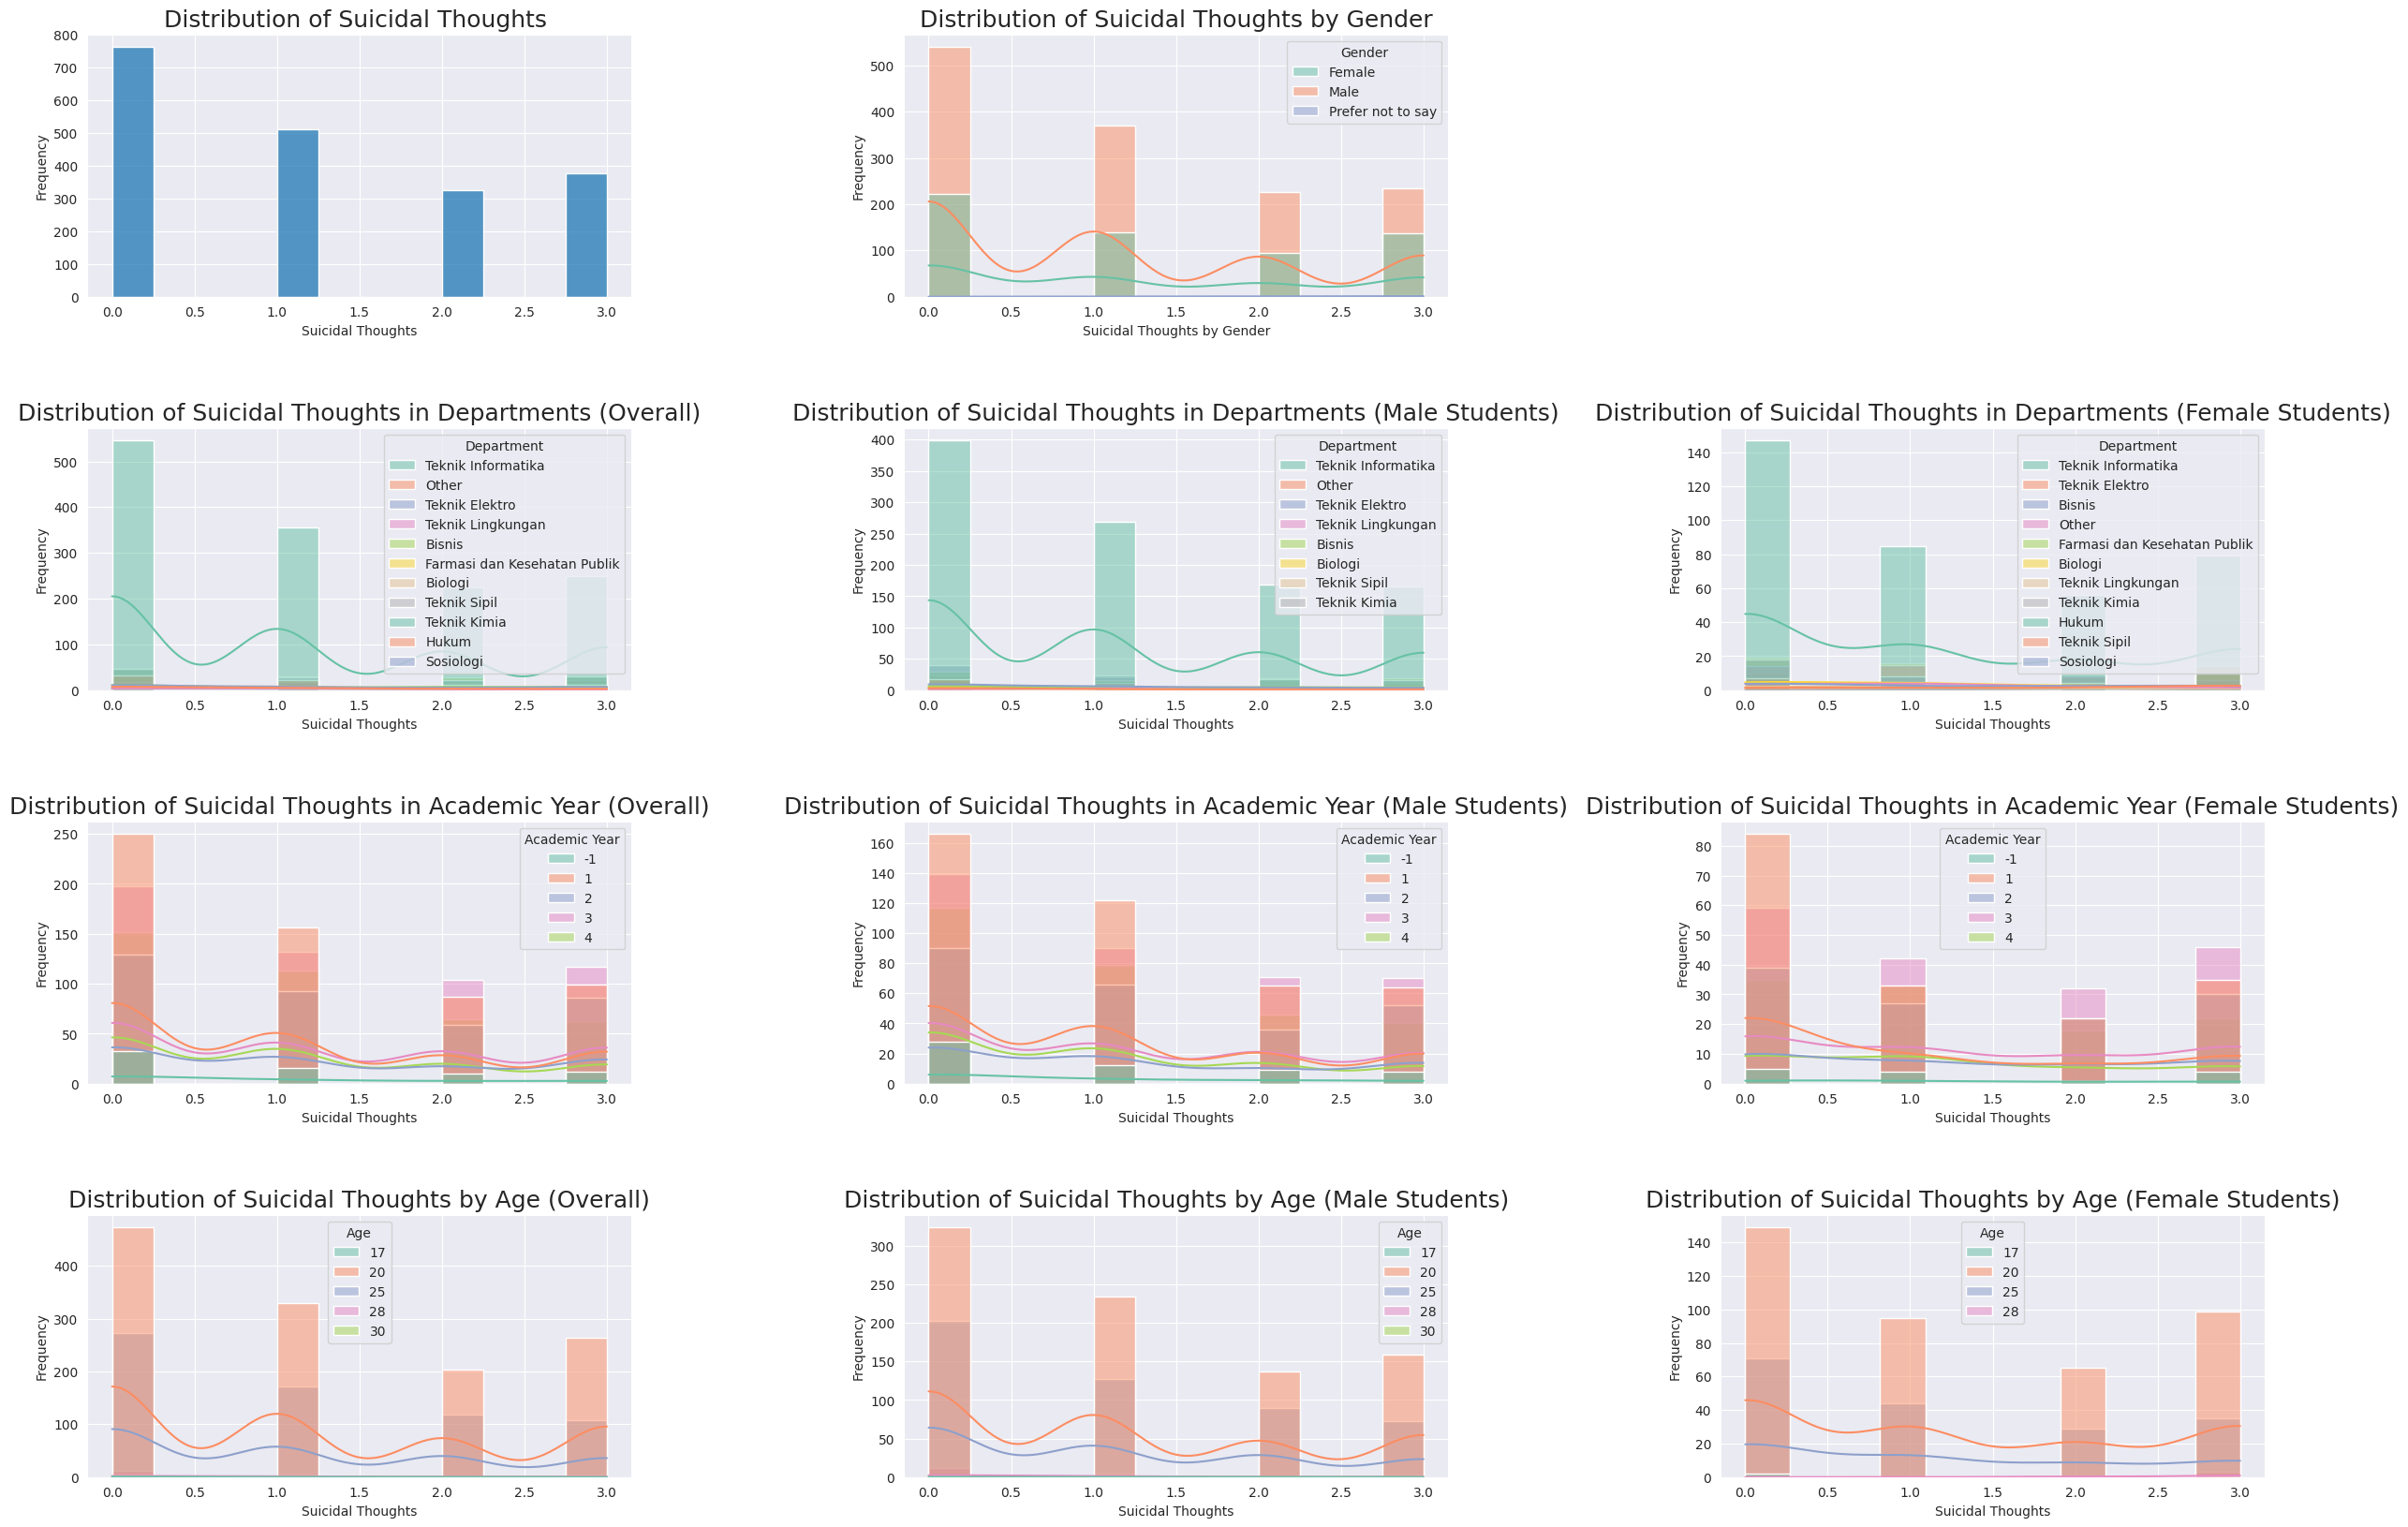

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(4,3,1)
sns.histplot(data=df, x="Suicidal Thoughts")
plt.title("Distribution of Suicidal Thoughts ",fontsize= 18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,2)
sns.histplot(data=df, x="Suicidal Thoughts", palette=palette, kde=True, hue="Gender")
plt.title("Distribution of Suicidal Thoughts by Gender",fontsize= 18)
plt.xlabel("Suicidal Thoughts by Gender")
plt.ylabel("Frequency")

plt.subplot(4,3,4)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,5)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,6)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Department", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Departments (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,7)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Academic Year", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,8)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Academic Year", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,9)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Academic Year", palette=palette)
plt.title("Distribution of Suicidal Thoughts in Academic Year (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,10)
sns.histplot(data=df, x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Overall)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,11)
sns.histplot(data=df[df.Gender == "Male"], x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Male Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")

plt.subplot(4,3,12)
sns.histplot(data=df[df.Gender == "Female"], x="Suicidal Thoughts", kde=True, hue="Age", palette=palette)
plt.title("Distribution of Suicidal Thoughts by Age (Female Students)", fontsize=18)
plt.xlabel("Suicidal Thoughts")
plt.ylabel("Frequency")


plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()


### Penjelasan Kesimpulan Pertanyaan 3
Dari visualisasi data diatas, disimpulkan bahwa label yang memiliki tingkat Suicidal Thougts tertinggi adalah:
  - Mahasiswa Program Studi Teknik Informatika
  - Mahasiswa semester 1
  - Persebaran antara laki-laki dan perempuan sama, tetapi untuk proporsi lebih banyak laki-laki

## Heatmap Correlation

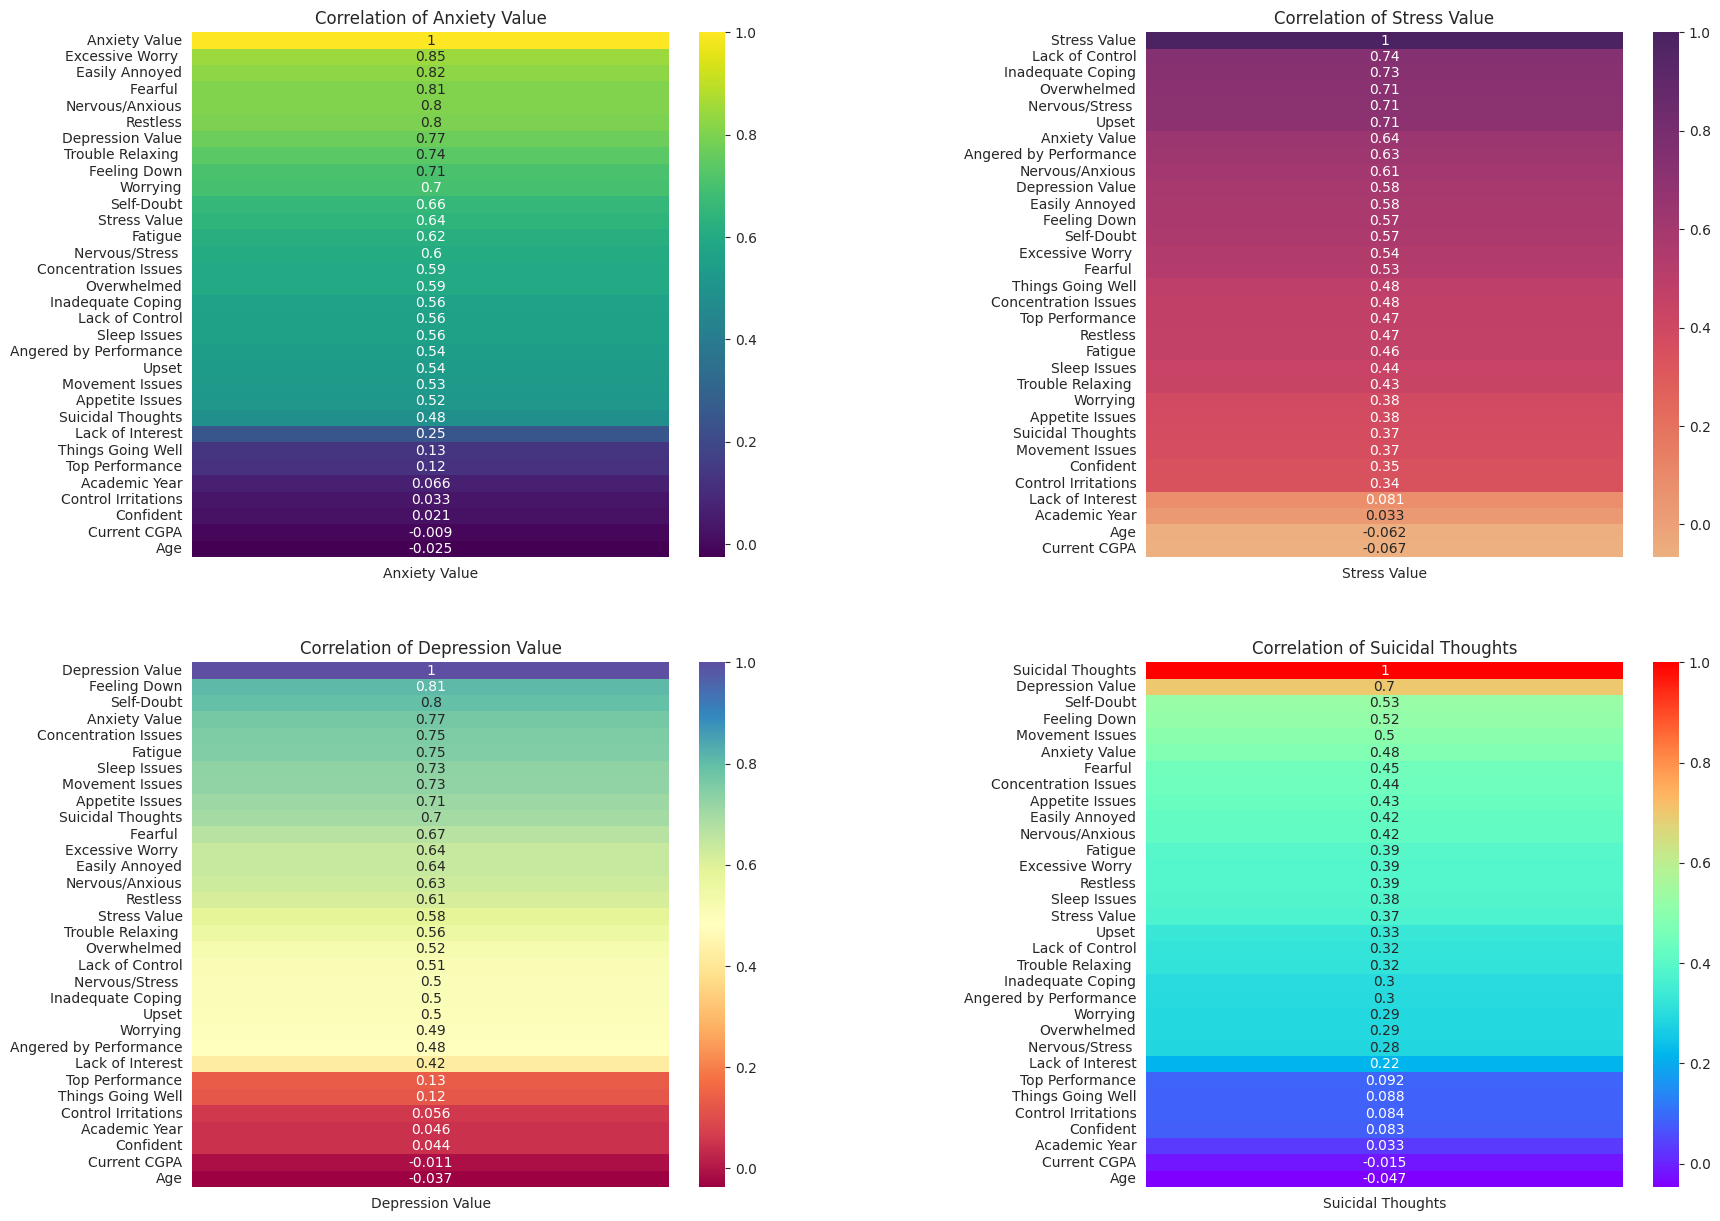

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.heatmap(data=df[numerical_columns].corr()["Anxiety Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="viridis" )
plt.title("Correlation of Anxiety Value")

plt.subplot(2,2,2)
sns.heatmap(data=df[numerical_columns].corr()["Stress Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="flare" )
plt.title("Correlation of Stress Value")

plt.subplot(2,2,3)
sns.heatmap(data=df[numerical_columns].corr()["Depression Value"].sort_values(ascending=False).to_frame(), annot=True, cmap="Spectral" )
plt.title("Correlation of Depression Value")

plt.subplot(2,2,4)
sns.heatmap(data=df[numerical_columns].corr()["Suicidal Thoughts"].sort_values(ascending=False).to_frame(), annot=True, cmap="rainbow")
plt.title("Correlation of Suicidal Thoughts")

plt.subplots_adjust(wspace=0.6)
plt.show()

### Penjelasan Kesimpulan Pertanyaan 4
1. Correlation of Anxiety:
  - Hal yang paling mempengaruhi dari Anxiety/kecemasan dari mahasiswa adalah:Excessive Worry, Easily Annoyed, Fearful, Nervous/Anxious,Restless, dan Depression. Hal ini dimungkin karena saat mahasiswa memiliki masalah dalam ujian atau perkuliahan

2. Correlation of Depression:
  - Feeling Down, Self Doubt, dan Anxiety adalah metric yang palinng mempengaruhi tingkat depresi mahasiswa

3. Correlation of Stress:
  - Hasil korelasinya menunjukkan Lack of Control, Inaduquate Coping dan Overwhelmed yang meliki tingkat korelasi tertinggi

4. Suicidal Thoughts:
  - Depresi yang paling berperan dalam tingkat peminatan metriks ini


# Data Preprocessing

##Encoder data

In [ ]:
# Mengimpor LabelEncoder untuk mengubah data kategorikal menjadi numerik
encoder = LabelEncoder()

# Mengiterasi setiap kolom kategorikal dan menerapkan LabelEncoder
for i in categorical_columns:
  df[i] = encoder.fit_transform(df[[i]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-25-cfc9ccfa99c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = encoder.fit_transform(df[[i]])
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-25-cfc9ccfa99c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
# Memisahkan fitur (X) dari label target (Y)
x = df.drop(columns=['Depression Label', 'Depression Value','Anxiety Label', 'Anxiety Value','Stress Label', 'Stress Value'])
y = df[['Depression Label', 'Anxiety Label', 'Stress Label']]

In [ ]:
# Membuat label terpisah untuk setiap target
y_anxiety = df['Anxiety Label']
y_depression = df['Depression Label']
y_stress = df['Stress Label']

In [ ]:
# Standarisasi data menggunakan StandardScaler untuk menyamakan skala fitur
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Splitting Data

In [ ]:
# Membagi data menjadi data pelatihan dan pengujian dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_test, y_train_Anxiety, y_test_Anxiety = train_test_split(x, y_anxiety, test_size=0.2, random_state=42)
X_train, X_test, y_train_Stress, y_test_Stress = train_test_split(x, y_stress, test_size=0.2, random_state=42)
X_train, X_test, y_train_Depression, y_test_Depression = train_test_split(x, y_depression, test_size=0.2, random_state=42)

In [ ]:
print("Anxiety Train Class Distribution:")
print(y_train_Anxiety.value_counts())

print("\nStress Train Class Distribution:")
print(y_train_Stress.value_counts())

print("\nDepression Train Class Distribution:")
print(y_train_Depression.value_counts())

Anxiety Train Class Distribution:
Anxiety Label
3    567
2    490
0    399
1    122
Name: count, dtype: int64

Stress Train Class Distribution:
Stress Label
2    1048
0     435
1      95
Name: count, dtype: int64

Depression Train Class Distribution:
Depression Label
5    395
3    389
2    353
0    337
1     72
4     32
Name: count, dtype: int64


## Oversampling

In [ ]:
# Mengimpor RandomOverSampler untuk menangani ketidakseimbangan kelas
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_Anxiety, y_train_Anxiety = ros.fit_resample(X_train, y_train_Anxiety)
X_train_Stress, y_train_Stress = ros.fit_resample(X_train, y_train_Stress)
X_train_Depression, y_train_Depression = ros.fit_resample(X_train, y_train_Depression)

print("Anxiety Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Anxiety).value_counts())

print("\nStress Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Stress).value_counts())

print("\nDepression Train Class Distribution After Oversampling:")
print(pd.Series(y_train_Depression).value_counts())

Anxiety Train Class Distribution After Oversampling:
Anxiety Label
0    567
1    567
2    567
3    567
Name: count, dtype: int64

Stress Train Class Distribution After Oversampling:
Stress Label
2    1048
1    1048
0    1048
Name: count, dtype: int64

Depression Train Class Distribution After Oversampling:
Depression Label
0    395
3    395
2    395
1    395
5    395
4    395
Name: count, dtype: int64


# Pemodelan dan Training, mencari model terbaik


Depression - K-Neighbors Classifier's accuracy: 65.0633
              precision    recall  f1-score   support

           0       0.54      0.82      0.65        71
           1       0.48      0.52      0.50        21
           2       0.64      0.31      0.41        95
           3       0.65      0.78      0.71       105
           4       0.55      0.50      0.52        12
           5       0.87      0.78      0.82        91

    accuracy                           0.65       395
   macro avg       0.62      0.62      0.60       395
weighted avg       0.67      0.65      0.64       395



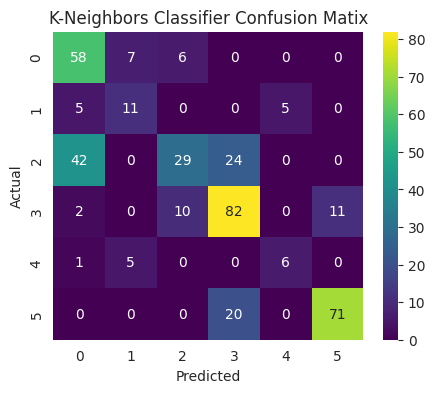

---------------------------------------------------------------------- 

Depression - Support Vector Classifier's accuracy: 87.3418
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        71
           1       0.48      0.52      0.50        21
           2       0.91      0.94      0.92        95
           3       0.93      0.91      0.92       105
           4       0.56      0.42      0.48        12
           5       0.92      0.93      0.93        91

    accuracy                           0.87       395
   macro avg       0.77      0.76      0.76       395
weighted avg       0.87      0.87      0.87       395



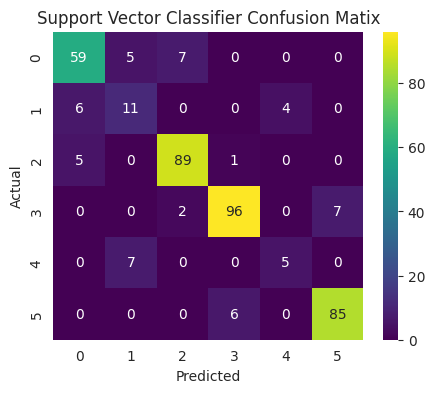

---------------------------------------------------------------------- 

Depression - Decision Tree Classifier's accuracy: 73.4177
              precision    recall  f1-score   support

           0       0.69      0.80      0.74        71
           1       0.84      0.76      0.80        21
           2       0.67      0.63      0.65        95
           3       0.74      0.61      0.67       105
           4       1.00      1.00      1.00        12
           5       0.77      0.89      0.83        91

    accuracy                           0.73       395
   macro avg       0.79      0.78      0.78       395
weighted avg       0.73      0.73      0.73       395



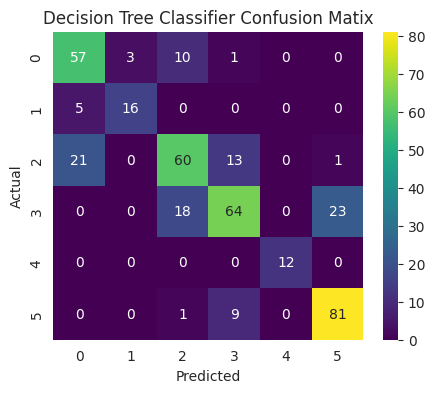

---------------------------------------------------------------------- 

Depression - Random Forest Classifier's accuracy: 83.038
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        71
           1       0.52      0.62      0.57        21
           2       0.85      0.81      0.83        95
           3       0.83      0.87      0.85       105
           4       0.86      0.50      0.63        12
           5       0.90      0.93      0.92        91

    accuracy                           0.83       395
   macro avg       0.80      0.75      0.77       395
weighted avg       0.83      0.83      0.83       395



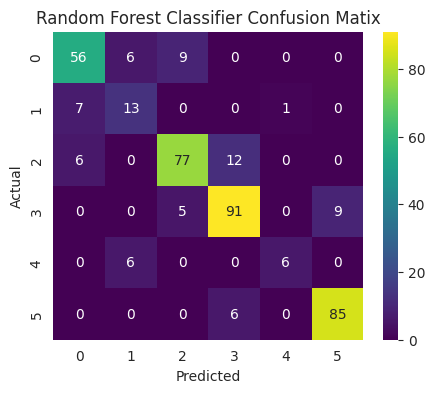

---------------------------------------------------------------------- 

Depression - Gradient Boosting Classifier's accuracy: 84.8101
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        71
           1       0.81      0.81      0.81        21
           2       0.84      0.73      0.78        95
           3       0.80      0.88      0.84       105
           4       0.92      1.00      0.96        12
           5       0.92      0.92      0.92        91

    accuracy                           0.85       395
   macro avg       0.86      0.87      0.86       395
weighted avg       0.85      0.85      0.85       395



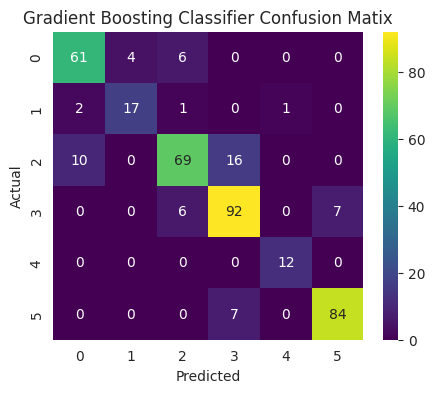

---------------------------------------------------------------------- 

Depression - XGBoost Classifier's accuracy: 84.557
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        71
           1       0.70      0.76      0.73        21
           2       0.83      0.82      0.83        95
           3       0.85      0.82      0.83       105
           4       0.90      0.75      0.82        12
           5       0.89      0.93      0.91        91

    accuracy                           0.85       395
   macro avg       0.83      0.82      0.83       395
weighted avg       0.85      0.85      0.85       395



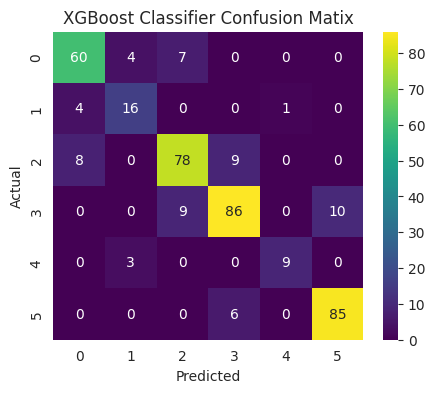

---------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Depression - AdaBoost Classifier's accuracy: 39.4937
              precision    recall  f1-score   support

           0       0.50      0.76      0.60        71
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        95
           3       0.00      0.00      0.00       105
           4       0.35      1.00      0.52        12
           5       0.36      0.99      0.52        91

    accuracy                           0.39       395
   macro avg       0.20      0.46      0.27       395
weighted avg       0.18      0.39      0.24       395



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


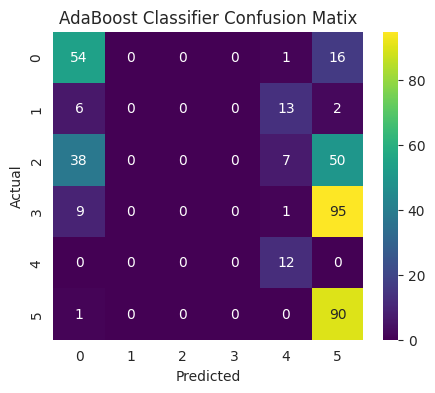

---------------------------------------------------------------------- 

Anxiety - K-Neighbors Classifier's accuracy: 79.4937
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        96
           1       0.82      0.77      0.79        35
           2       0.69      0.78      0.73       119
           3       0.96      0.79      0.86       145

    accuracy                           0.79       395
   macro avg       0.80      0.79      0.79       395
weighted avg       0.81      0.79      0.80       395



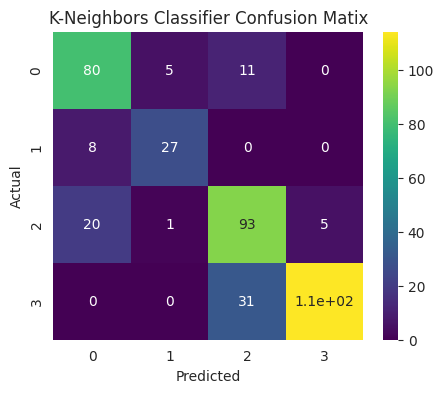

---------------------------------------------------------------------- 

Anxiety - Support Vector Classifier's accuracy: 93.4177
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        96
           1       0.87      0.97      0.92        35
           2       0.91      0.92      0.92       119
           3       0.97      0.97      0.97       145

    accuracy                           0.93       395
   macro avg       0.92      0.94      0.93       395
weighted avg       0.94      0.93      0.93       395



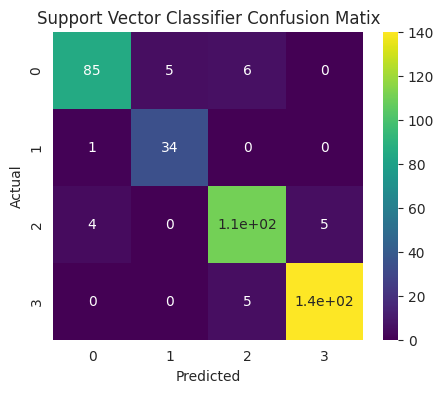

---------------------------------------------------------------------- 

Anxiety - Decision Tree Classifier's accuracy: 81.0127
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        96
           1       0.79      0.77      0.78        35
           2       0.75      0.75      0.75       119
           3       0.87      0.90      0.88       145

    accuracy                           0.81       395
   macro avg       0.80      0.80      0.80       395
weighted avg       0.81      0.81      0.81       395



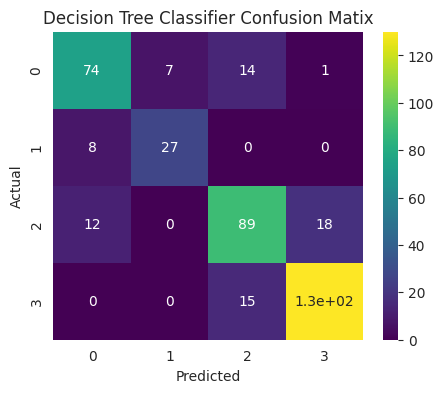

---------------------------------------------------------------------- 

Anxiety - Random Forest Classifier's accuracy: 89.3671
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        96
           1       0.93      0.80      0.86        35
           2       0.84      0.89      0.87       119
           3       0.95      0.93      0.94       145

    accuracy                           0.89       395
   macro avg       0.90      0.87      0.88       395
weighted avg       0.90      0.89      0.89       395



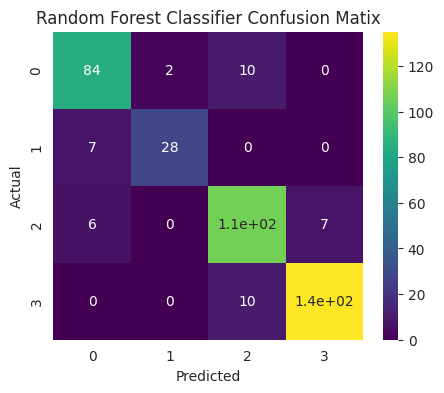

---------------------------------------------------------------------- 

Anxiety - Gradient Boosting Classifier's accuracy: 93.6709
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        96
           1       0.89      0.97      0.93        35
           2       0.90      0.93      0.92       119
           3       0.98      0.94      0.96       145

    accuracy                           0.94       395
   macro avg       0.93      0.94      0.93       395
weighted avg       0.94      0.94      0.94       395



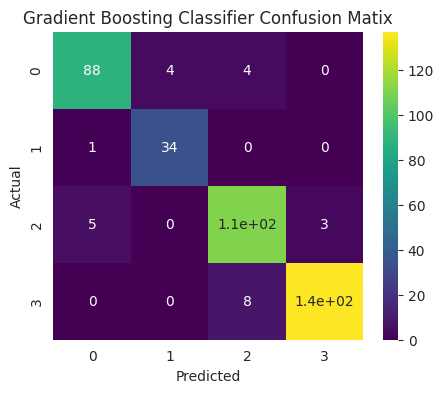

---------------------------------------------------------------------- 

Anxiety - XGBoost Classifier's accuracy: 92.9114
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        96
           1       0.92      0.94      0.93        35
           2       0.91      0.90      0.90       119
           3       0.97      0.95      0.96       145

    accuracy                           0.93       395
   macro avg       0.92      0.93      0.93       395
weighted avg       0.93      0.93      0.93       395



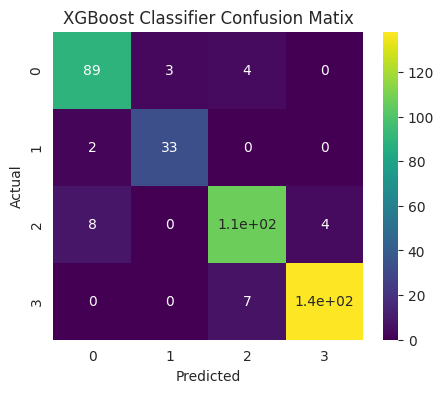

---------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Anxiety - AdaBoost Classifier's accuracy: 88.3544
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        96
           1       0.89      0.94      0.92        35
           2       0.79      0.91      0.84       119
           3       0.97      0.83      0.89       145

    accuracy                           0.88       395
   macro avg       0.89      0.90      0.89       395
weighted avg       0.89      0.88      0.88       395



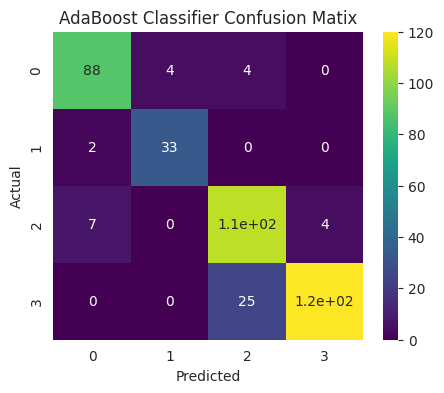

---------------------------------------------------------------------- 

Stress - K-Neighbors Classifier's accuracy: 84.8101
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       110
           1       0.58      0.75      0.65        20
           2       0.91      0.85      0.88       265

    accuracy                           0.85       395
   macro avg       0.75      0.82      0.78       395
weighted avg       0.86      0.85      0.85       395



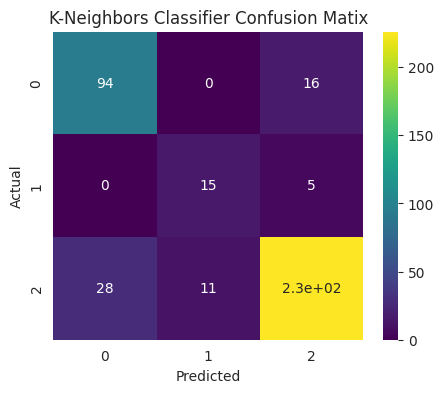

---------------------------------------------------------------------- 

Stress - Support Vector Classifier's accuracy: 96.2025
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       110
           1       0.89      0.80      0.84        20
           2       0.97      0.97      0.97       265

    accuracy                           0.96       395
   macro avg       0.94      0.91      0.92       395
weighted avg       0.96      0.96      0.96       395



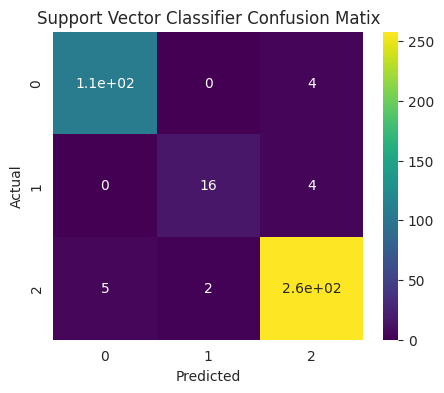

---------------------------------------------------------------------- 

Stress - Decision Tree Classifier's accuracy: 84.0506
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.38      0.45      0.41        20
           2       0.89      0.87      0.88       265

    accuracy                           0.84       395
   macro avg       0.70      0.72      0.71       395
weighted avg       0.85      0.84      0.84       395



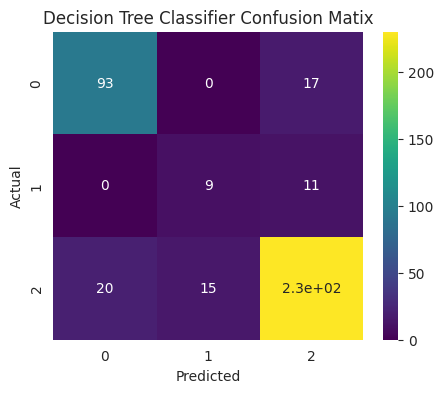

---------------------------------------------------------------------- 

Stress - Random Forest Classifier's accuracy: 90.1266
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       110
           1       0.89      0.40      0.55        20
           2       0.91      0.94      0.93       265

    accuracy                           0.90       395
   macro avg       0.89      0.74      0.79       395
weighted avg       0.90      0.90      0.90       395



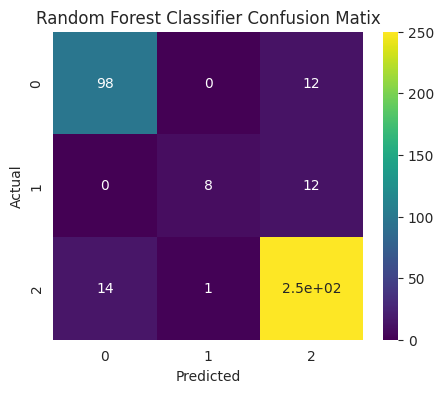

---------------------------------------------------------------------- 

Stress - Gradient Boosting Classifier's accuracy: 93.4177
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       110
           1       0.73      0.80      0.76        20
           2       0.96      0.94      0.95       265

    accuracy                           0.93       395
   macro avg       0.87      0.89      0.88       395
weighted avg       0.94      0.93      0.93       395



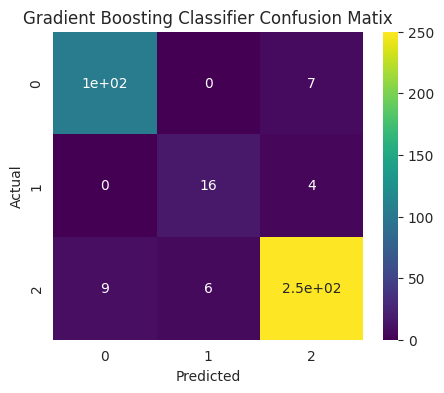

---------------------------------------------------------------------- 

Stress - XGBoost Classifier's accuracy: 91.8987
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       110
           1       0.72      0.65      0.68        20
           2       0.94      0.94      0.94       265

    accuracy                           0.92       395
   macro avg       0.86      0.83      0.84       395
weighted avg       0.92      0.92      0.92       395



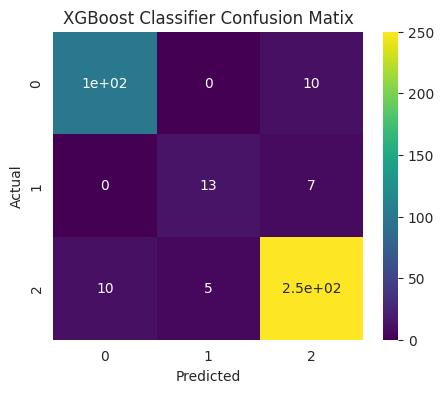

---------------------------------------------------------------------- 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Stress - AdaBoost Classifier's accuracy: 92.4051
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       110
           1       0.93      0.65      0.76        20
           2       0.92      0.98      0.95       265

    accuracy                           0.92       395
   macro avg       0.93      0.82      0.87       395
weighted avg       0.93      0.92      0.92       395



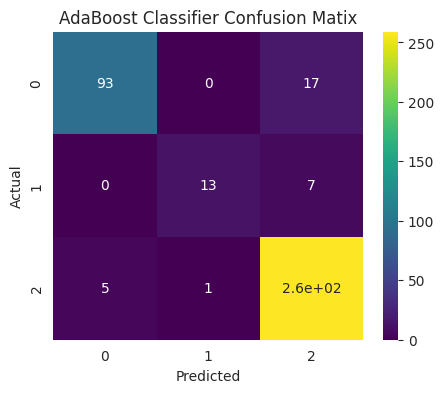

---------------------------------------------------------------------- 



In [ ]:
models = {
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": XGBClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(random_state=42)
}

conditions = ["Depression", "Anxiety", "Stress"]
results = []

for condition in conditions:
    if condition == "Depression":
        X_train, X_test, Y_train, Y_test = X_train_Depression, X_test, y_train_Depression, y_test_Depression
    elif condition == "Anxiety":
        X_train, X_test, Y_train, Y_test = X_train_Anxiety, X_test, y_train_Anxiety, y_test_Anxiety
    elif condition == "Stress":
        X_train, X_test, Y_train, Y_test = X_train_Stress, X_test, y_train_Stress, y_test_Stress

    for name, model in models.items():
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred) * 100
        cm = confusion_matrix(Y_test,Y_pred)
        results.append({"Condition": condition, "Model": name, "Accuracy": round(accuracy, 4)})

        print(f"{condition} - {name}'s accuracy: {round(accuracy, 4)}")
        print(classification_report(Y_test, Y_pred))

        plt.figure(figsize=(5,4))
        sns.heatmap(cm,annot=True, cmap="viridis")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{name} Confusion Matix")
        plt.show()
        print("-" * 70, "\n")


In [ ]:
evaluation_df = pd.DataFrame(results)
evaluation_df

,Condition,Model,Accuracy
0,Depression,K-Neighbors Classifier,65.0633
1,Depression,Support Vector Classifier,87.3418
2,Depression,Decision Tree Classifier,73.4177
3,Depression,Random Forest Classifier,83.0380
4,Depression,Gradient Boosting Classifier,84.8101
5,Depression,XGBoost Classifier,84.5570
6,Depression,AdaBoost Classifier,39.4937
7,Anxiety,K-Neighbors Classifier,79.4937
8,Anxiety,Support Vector Classifier,93.4177
9,Anxiety,Decision Tree Classifier,81.0127


## Perbandingan Model

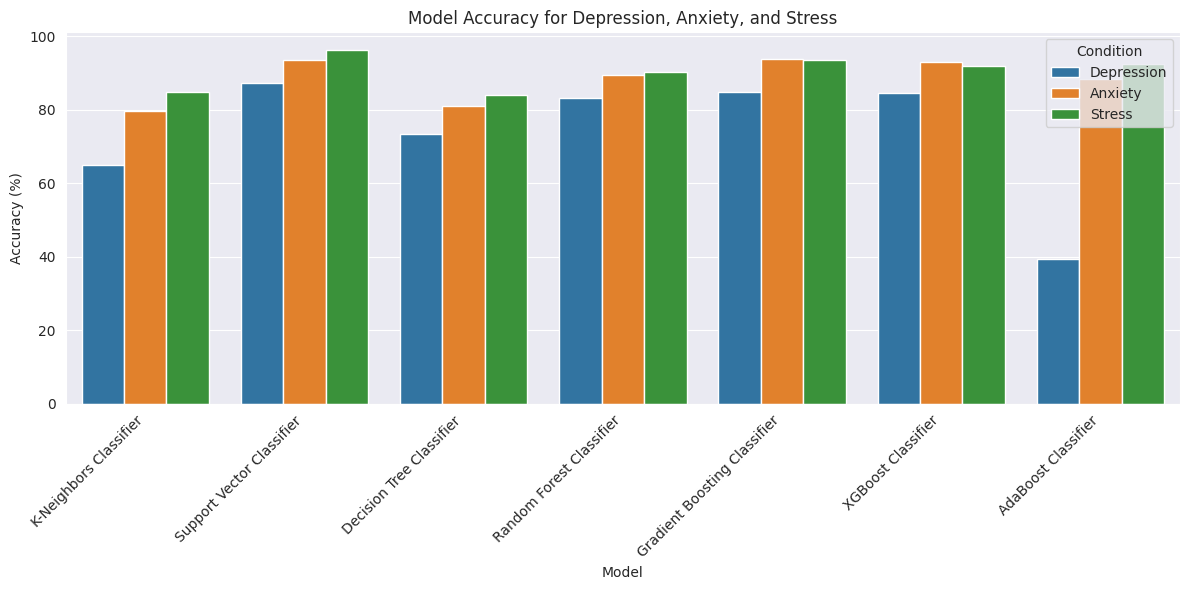

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'evaluation_df' is your DataFrame with results

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', hue='Condition', data=evaluation_df)
plt.title('Model Accuracy for Depression, Anxiety, and Stress')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## SVC

In [ ]:
model_anxiety = GradientBoostingClassifier(random_state=42)
model_anxiety.fit(X_train_Anxiety, y_train_Anxiety)

model_stress = SVC(random_state=42)
model_stress.fit(X_train_Stress,y_train_Stress)

model_depression = SVC(random_state=42)
model_depression.fit(X_train_Depression,y_train_Depression)

SVC(random_state=42)

## Prediksi dan Conffussion Matrix SVC

In [ ]:
def predict_all_labels(X_test):
    pred_anxiety = model_anxiety.predict(X_test)
    pred_stress = model_stress.predict(X_test)
    pred_depression = model_depression.predict(X_test)

    predictions = {
        "Anxiety Label": pred_anxiety,
        "Stress Label": pred_stress,
        "Depression Label": pred_depression
    }

    return predictions

In [ ]:
predictions = predict_all_labels(X_test)
pred_df = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

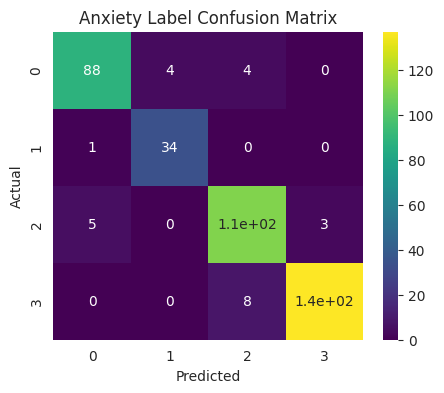

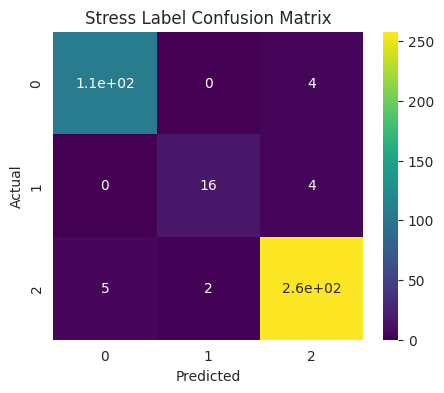

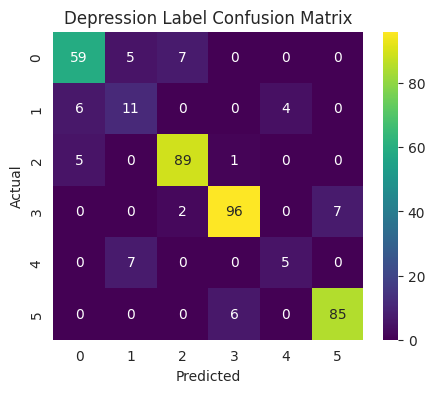

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model_anxiety, model_stress, and model_depression are already trained

# ... (Your existing code) ...

# Predict using the trained models
predictions = predict_all_labels(X_test)

# Create confusion matrices for each label
for label in ['Anxiety Label', 'Stress Label', 'Depression Label']:
    cm = confusion_matrix(y_test[label], predictions[label])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, cmap="viridis")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{label} Confusion Matrix")
    plt.show()

In [ ]:
for label in ["Anxiety Label", "Stress Label", "Depression Label"]:
    print(f"Classification Report for {label}:")
    print(classification_report(y_test[label], pred_df[label]))

Classification Report for Anxiety Label:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        96
           1       0.89      0.97      0.93        35
           2       0.90      0.93      0.92       119
           3       0.98      0.94      0.96       145

    accuracy                           0.94       395
   macro avg       0.93      0.94      0.93       395
weighted avg       0.94      0.94      0.94       395

Classification Report for Stress Label:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       110
           1       0.89      0.80      0.84        20
           2       0.97      0.97      0.97       265

    accuracy                           0.96       395
   macro avg       0.94      0.91      0.92       395
weighted avg       0.96      0.96      0.96       395

Classification Report for Depression Label:
              precision    recall  f1-score   support

    

# Kesimpulan

**Model Terbaik untuk Prediksi Kesehatan Mental:**

- **Depresi:** Support Vector Classifier (SVC) menunjukkan akurasi tertinggi dalam memprediksi depresi, yang menunjukkan efektivitasnya dalam menangani kompleksitas label depresi.  
- **Stres:** SVC juga memberikan kinerja terbaik untuk prediksi stres, menunjukkan kekuatannya dalam membedakan tingkat stres.  
- **Kecemasan:** Gradient Boosting Classifier merupakan yang paling efektif untuk memprediksi kecemasan, menyoroti kemampuannya dalam menangkap pola kecemasan dengan akurasi sebesar 93.6709.  